# LOAN ELIGIBILITY PREDICTION

##### Import modules

In [215]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###### Loading the dataset

In [216]:
df = pd.read_csv("loan-train (12).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [217]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [218]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


###### Preprocessing the dataset

In [219]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [220]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [221]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [222]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###### Creation of new attributes
 

In [223]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


###### Coorelation Matrix

<AxesSubplot:>

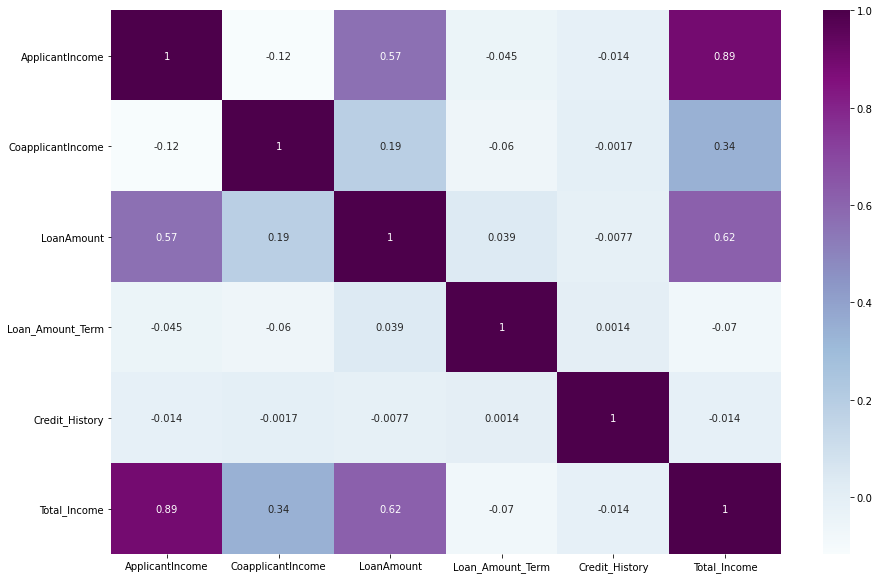

In [224]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [225]:
# drop unnecessary columns
cols = ['CoapplicantIncome', 'Loan_ID','Gender']
df = df.drop(columns=cols, axis=1)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,No,0,Graduate,No,5849,146.412162,360.0,1.0,Urban,Y,5849.0
1,Yes,1,Graduate,No,4583,128.000000,360.0,1.0,Rural,N,6091.0
2,Yes,0,Graduate,Yes,3000,66.000000,360.0,1.0,Urban,Y,3000.0
3,Yes,0,Not Graduate,No,2583,120.000000,360.0,1.0,Urban,Y,4941.0
4,No,0,Graduate,No,6000,141.000000,360.0,1.0,Urban,Y,6000.0


###### Label Encoding


In [226]:
from sklearn.preprocessing import LabelEncoder
cols = ["Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [227]:
df.tail()


,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
609,0,0,0,0,2900,71.0,360.0,1.0,0,1,2900.0
610,1,3,0,0,4106,40.0,180.0,1.0,0,1,4106.0
611,1,1,0,0,8072,253.0,360.0,1.0,2,1,8312.0
612,1,2,0,0,7583,187.0,360.0,1.0,2,1,7583.0
613,0,0,0,1,4583,133.0,360.0,0.0,1,0,4583.0


###### Train-Test Split & Accuracy



In [228]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)

y = df['Loan_Status']


In [229]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [241]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [242]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.78368652538984


In [243]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 71.42857142857143
Cross validation is 71.01426096228177


###### Confusion Matrix

In [199]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)
print(cm)

[[22 32]
 [ 2 98]]


<AxesSubplot:>

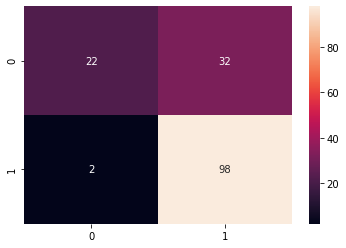

In [200]:
sns.heatmap(cm, annot=True)

In [244]:
print(model.predict([[0,0,0,0,5849,146.412162,360,1.0,2,5849.0]]))

[1]


In [248]:
print(model.predict([[0,0,0,1,4583,133.0,360.0,0.0,1,4583.0]]))

[0]


### Observations

 DataSet of both Categorical values & Numerical values

Prepossing-->filled all null values , removed unnecessary columns & converted  categorical values[gender,marital status] to numerical values

Dependent Variable-Loan_Status

Accuracy-->For Logistic Regression-77.923 &  
           For DecisionTreeClassifier-71.423     
           *Best Logistic Regression*

Output-->
Based on input Columns we predict whether a person is eligible for loan or not          
output is denoted in Loan_Status[0,1]            
0-->Not Eligible for Loan           
1-->Eligible for Loan


## Conclusion

###### The Logistic Regression Algorithm gives us the Maximum Accuracy[78%approx] compared to other Classification Algorithms